In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers  

In [7]:
max_features = 20000
(X_train,y_train),(X_val,y_val) = keras.datasets.imdb.load_data(
    num_words = max_features
)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [8]:
print(len(X_train), " Training data")
print(len(X_val), " Validation data")
print(X_train.shape)
print(X_train)

25000  Training data
25000  Validation data
(25000,)
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19

In [9]:
maxlen = 200 
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_val = keras.preprocessing.sequence.pad_sequences(X_val, maxlen=maxlen)

In [11]:
#Building the model
inputs = keras.Input(shape=(None,), dtype="int32")
#Embedding into 128 dim vector
x = layers.Embedding(max_features, 128)(inputs)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
output = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         98816     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,757,761
Trainable params: 2,757,761
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile("adam","binary_crossentropy", metrics = ["accuracy"])

In [14]:
nb_epoch = 3
history = model.fit(X_train, y_train, batch_size=32, epochs = nb_epoch, verbose=1, validation_data=(X_val, y_val) )

Epoch 1/3
782/782 [==============================] - 457s 585ms/step - loss: 0.4780 - accuracy: 0.7810 - val_loss: 0.3609 - val_accuracy: 0.8426
Epoch 2/3
782/782 [==============================] - 461s 590ms/step - loss: 0.2595 - accuracy: 0.8985 - val_loss: 0.3653 - val_accuracy: 0.8552
Epoch 3/3
782/782 [==============================] - 459s 587ms/step - loss: 0.1666 - accuracy: 0.9394 - val_loss: 0.3150 - val_accuracy: 0.8724


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
def plt_dynamic(x, vy, ty, ax, colors= ['b'] ):
    ax.plot(x, vy, 'b', label = "Validation Loss")
    ax.plot(x, ty, 'r', label = "Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw() 

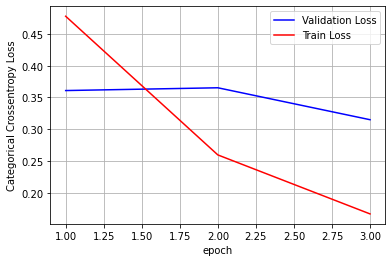

In [16]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# We will get val_loss , val_acc when validation_data is passed
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
#It better to take only two epochs as the difference between train loss and validation loss are increasing with the increase of epoch number

In [17]:
#Building the model
inputs = keras.Input(shape=(None,), dtype="int32")
#Embedding into 128 dim vector
x = layers.Embedding(max_features, 128)(inputs)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
output = layers.Dense(1, activation="relu")(x)
model = keras.Model(inputs, output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 128)         98816     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,757,761
Trainable params: 2,757,761
Non-trainable params: 0
_________________________________________________________________


In [20]:
nb_epoch = 2
model.compile("adam","binary_crossentropy", metrics = ["accuracy"])
history = model.fit(X_train, y_train, batch_size=32, epochs = nb_epoch, verbose=1, validation_data=(X_val, y_val) )

Epoch 1/2
782/782 [==============================] - 462s 583ms/step - loss: 0.5962 - accuracy: 0.6938 - val_loss: 0.4606 - val_accuracy: 0.8044
Epoch 2/2
782/782 [==============================] - 456s 583ms/step - loss: 0.4633 - accuracy: 0.8343 - val_loss: 0.4289 - val_accuracy: 0.8304
